# Comparar os modelos CNN


## 1 Imports

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


## 2 Parâmetros

In [2]:
base_dir = '../data/Plastic_Classification_224'
image_size = (224, 224)
batch_size = 32

## 3 Carregamento do dataset de teste

In [3]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',  # ❀ IMPORTANTE!
    shuffle=False
)

Found 209 files belonging to 7 classes.


## 4 Carregar os modelos treinados

In [4]:
modelo_simples = load_model('./modelos/modelo_cnn_simples_plasticos.keras')
modelo_otimizado = load_model('./modelos/modelo_cnn_regularizado_otimizado.keras')

### 4.1 Garantir que o modelo esteja compilado corretamente com categorical_crossentropy

In [5]:
modelo_simples.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
modelo_otimizado.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## 5  Avaliação

In [6]:
loss_simples, acc_simples = modelo_simples.evaluate(test_ds, verbose=0)
loss_otimizado, acc_otimizado = modelo_otimizado.evaluate(test_ds, verbose=0)

print("Modelo Simples     - Loss:", round(loss_simples, 4), "| Acurácia:", round(acc_simples * 100, 2), "%")
print("Modelo Otimizado   - Loss:", round(loss_otimizado, 4), "| Acurácia:", round(acc_otimizado * 100, 2), "%")

Modelo Simples     - Loss: 1336.4103 | Acurácia: 20.57 %
Modelo Otimizado   - Loss: 43.2266 | Acurácia: 15.79 %


## 6 Visualização comparativa

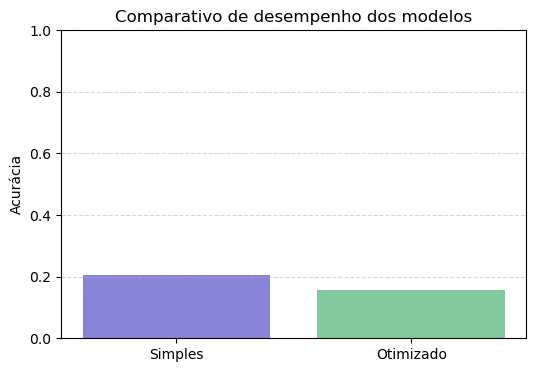

In [7]:

plt.figure(figsize=(6,4))
plt.bar(['Simples', 'Otimizado'], [acc_simples, acc_otimizado], color=['#8884d8', '#82ca9d'])
plt.ylabel('Acurácia')
plt.title('Comparativo de desempenho dos modelos')
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
modelo | F1-score Acurácia | Número de paramentros |Tempo de Treinamento | Tempo de inferencia | Uso de Memoria

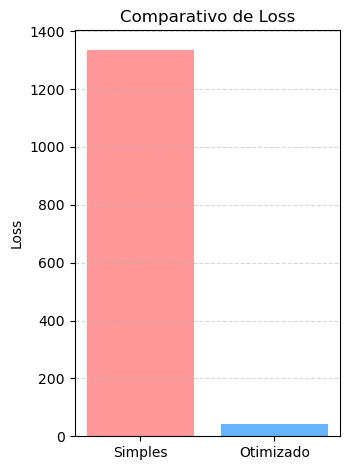

In [8]:
# 🔺 Visualização comparativa - Loss
plt.subplot(1, 2, 2)
plt.bar(['Simples', 'Otimizado'], [loss_simples, loss_otimizado], color=['#ff9999', '#66b3ff'])
plt.ylabel('Loss')
plt.title('Comparativo de Loss')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [10]:
# 🔍 Predições para F1-Score e Matriz de Confusão
true_labels = np.concatenate([y for x, y in test_ds])
preds_simples = modelo_simples.predict(test_ds)
preds_otimizado = modelo_otimizado.predict(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 666ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


In [11]:
true_classes = np.argmax(true_labels, axis=1)
pred_classes_simples = np.argmax(preds_simples, axis=1)
pred_classes_otimizado = np.argmax(preds_otimizado, axis=1)

In [12]:
# 🎯 Métricas adicionais
f1_simples = f1_score(true_classes, pred_classes_simples, average='weighted')
f1_otimizado = f1_score(true_classes, pred_classes_otimizado, average='weighted')

print("\n📊 Métricas de Comparação")
print("Modelo Simples     - Loss:", round(loss_simples, 4), 
      "| Acurácia:", round(acc_simples * 100, 2), "%",
      "| F1-score:", round(f1_simples, 4),
      "| Tempo de inferência:", round(tempo_simples, 2), "segundos")

print("Modelo Otimizado   - Loss:", round(loss_otimizado, 4), 
      "| Acurácia:", round(acc_otimizado * 100, 2), "%",
      "| F1-score:", round(f1_otimizado, 4),
      "| Tempo de inferência:", round(tempo_otimizado, 2), "segundos")


NameError: name 'f1_score' is not defined

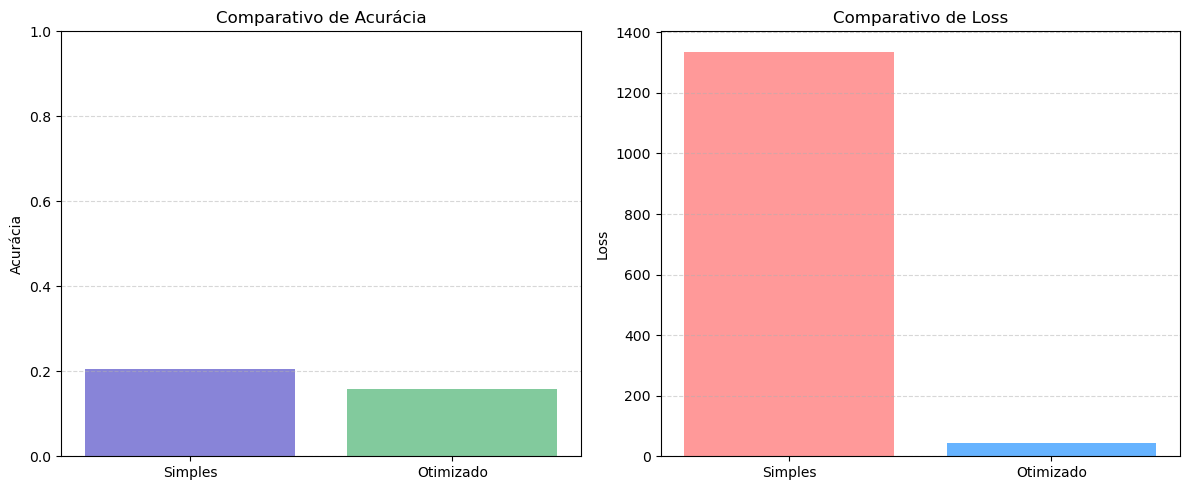

NameError: name 'sns' is not defined

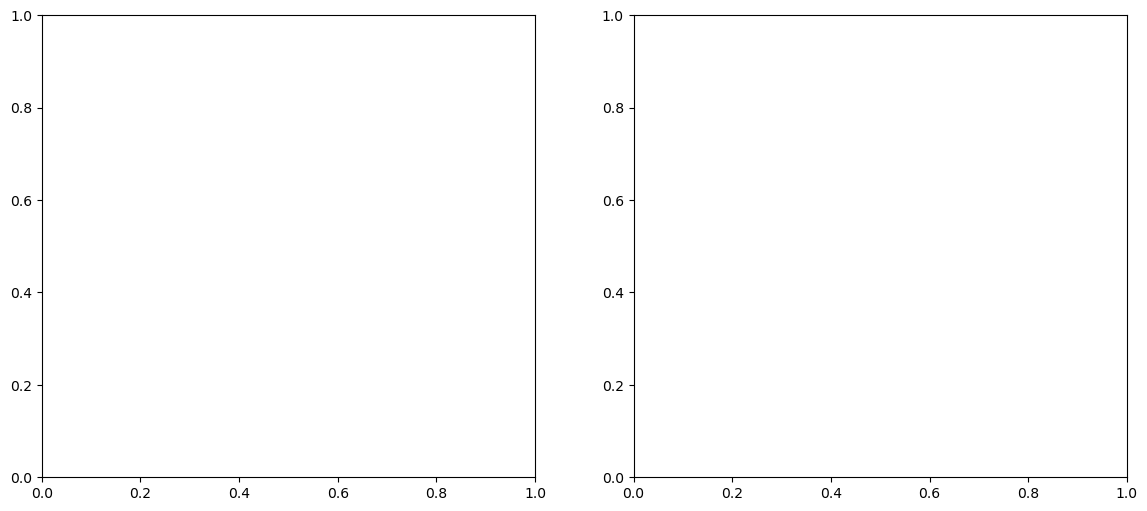

In [13]:
# 📊 Visualização comparativa - Acurácia e Loss
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.bar(['Simples', 'Otimizado'], [acc_simples, acc_otimizado], color=['#8884d8', '#82ca9d'])
plt.ylabel('Acurácia')
plt.title('Comparativo de Acurácia')
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.bar(['Simples', 'Otimizado'], [loss_simples, loss_otimizado], color=['#ff9999', '#66b3ff'])
plt.ylabel('Loss')
plt.title('Comparativo de Loss')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 📉 Matriz de confusão
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(confusion_matrix(true_classes, pred_classes_simples), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Matriz - Modelo Simples')
axes[0].set_xlabel('Previsto')
axes[0].set_ylabel('Real')
axes[0].set_xticklabels(class_names)
axes[0].set_yticklabels(class_names)

sns.heatmap(confusion_matrix(true_classes, pred_classes_otimizado), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Matriz - Modelo Otimizado')
axes[1].set_xlabel('Previsto')
axes[1].set_ylabel('Real')
axes[1].set_xticklabels(class_names)
axes[1].set_yticklabels(class_names)

plt.tight_layout()
plt.show()

# 📋 Relatório de classificação
print("\nRelatório - Modelo Simples")
print(classification_report(true_classes, pred_classes_simples, target_names=class_names))

print("\nRelatório - Modelo Otimizado")
print(classification_report(true_classes, pred_classes_otimizado, target_names=class_names))

